# Handwriting A-Z alphabet (Classification)
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Data Science Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
alphabet = pd.read_csv('/kaggle/input/az-handwritten-alphabets-in-csv-format/A_Z Handwritten Data.csv')
alphabet.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
alphabet.shape

(372450, 785)

In [4]:
alphabet.nunique()

0        26
0.1       1
0.2       1
0.3       1
0.4       1
         ..
0.644     5
0.645     5
0.646     5
0.647     3
0.648     2
Length: 785, dtype: int64

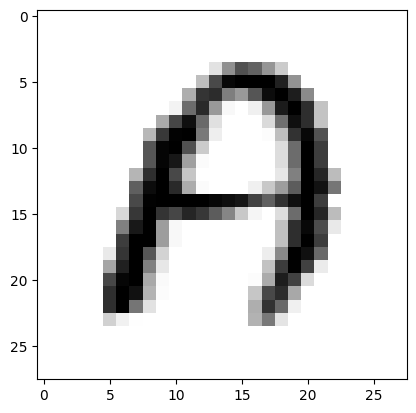

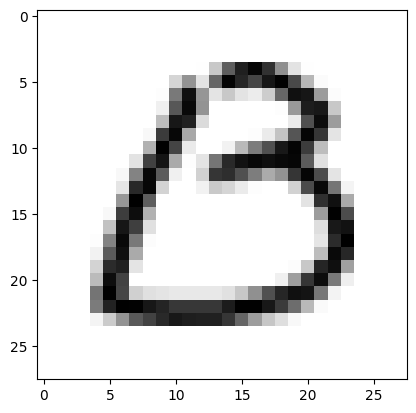

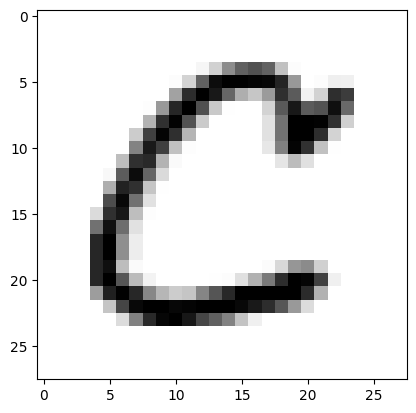

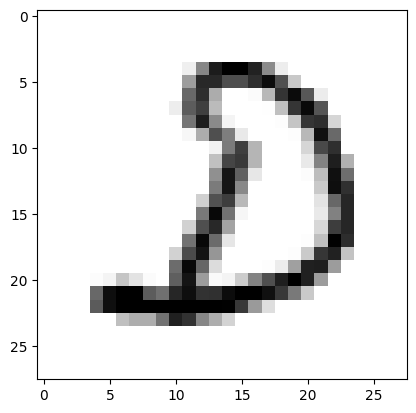

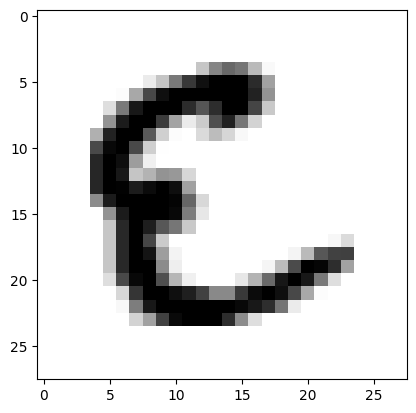

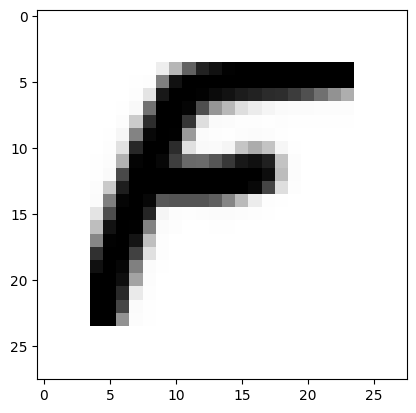

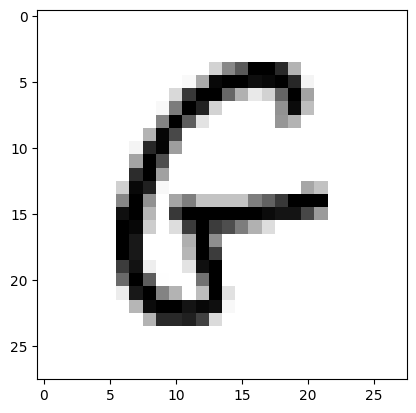

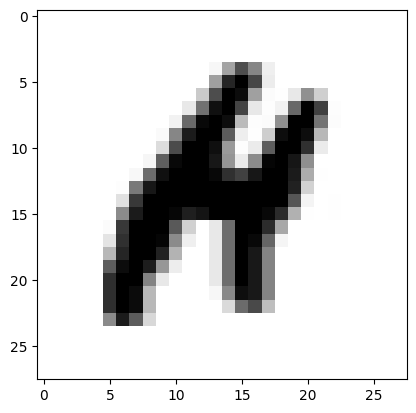

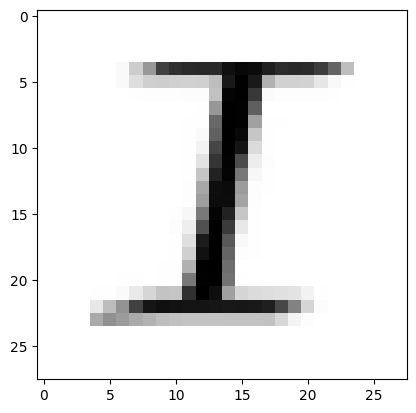

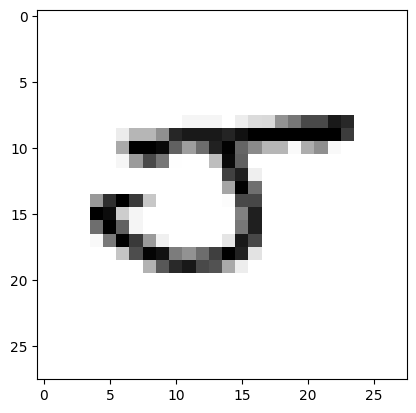

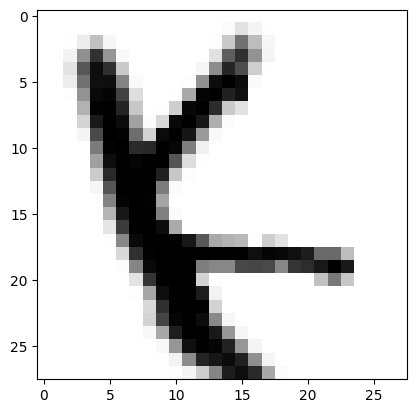

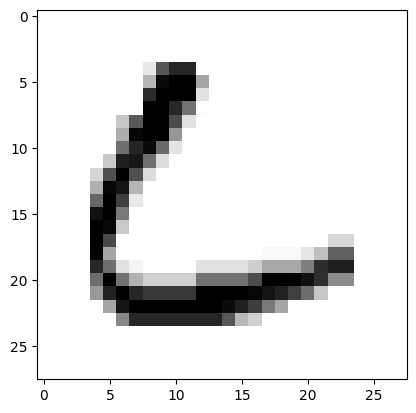

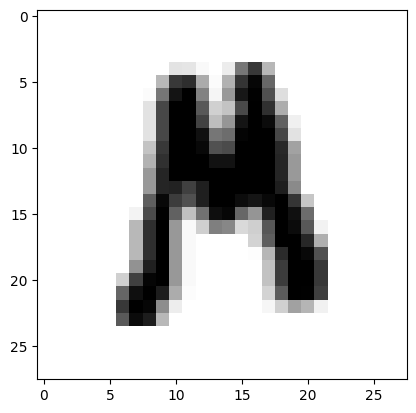

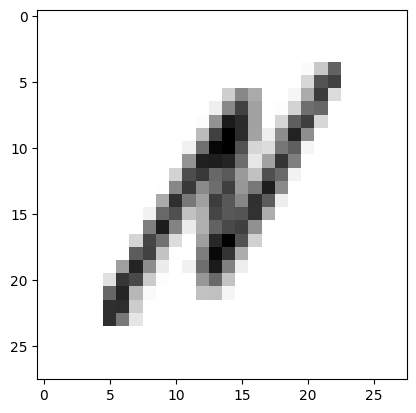

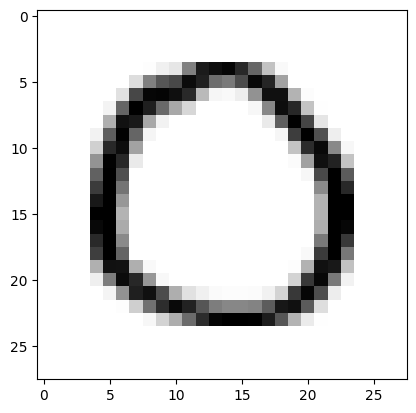

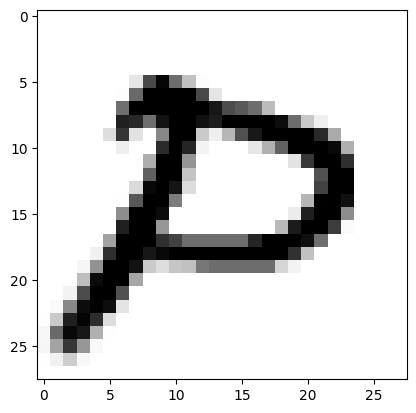

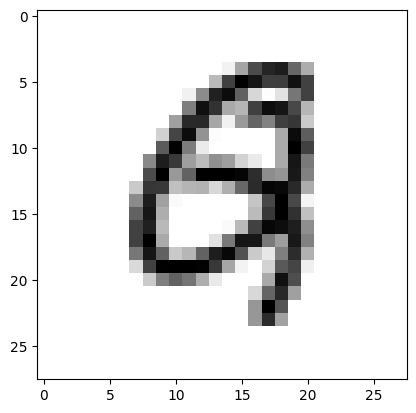

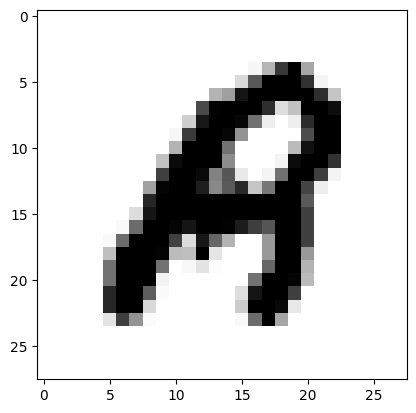

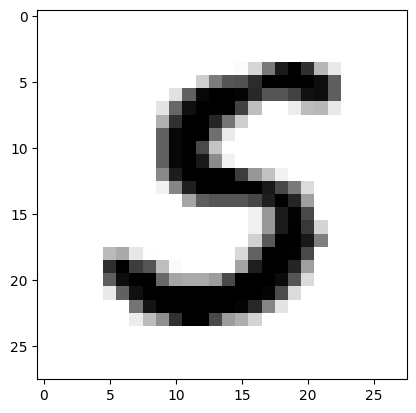

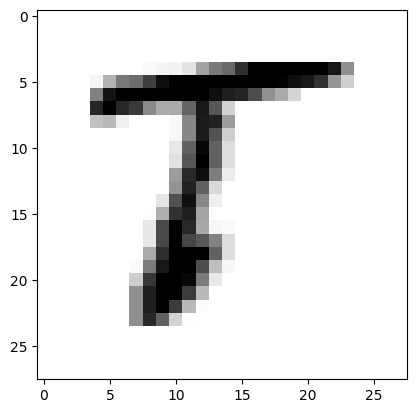

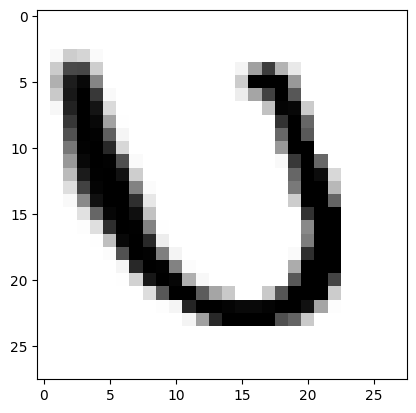

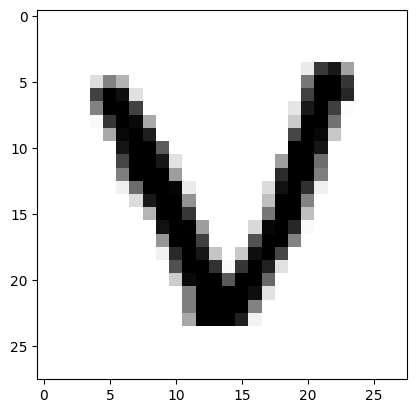

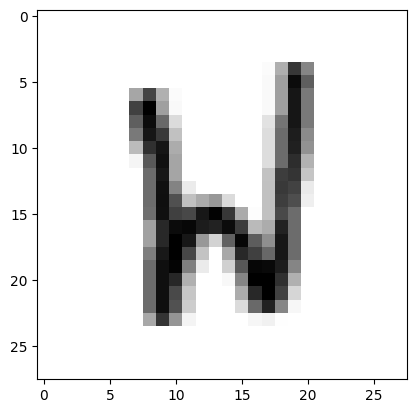

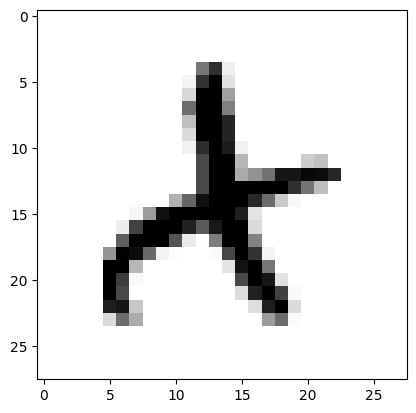

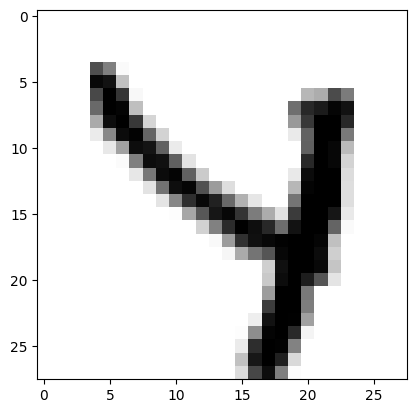

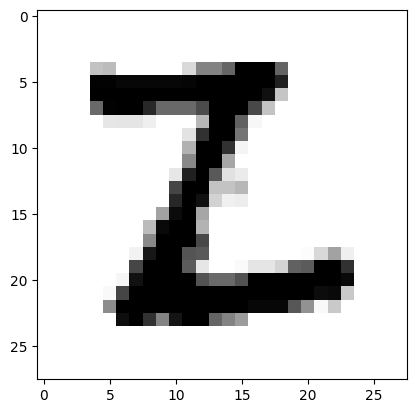

In [5]:
for i in range(26):
    alpha = alphabet[alphabet['0']==i].iloc[1]
    x = alpha[1:].values
    x = x.reshape((28, 28))
    plt.imshow(x, cmap='binary')
    plt.show()

In [6]:
from sklearn.model_selection import train_test_split
X = alphabet.drop('0',axis=1)
y = alphabet['0']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [17]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, roc_auc_score, roc_curve, ConfusionMatrixDisplay, classification_report

def analysis_model_with_test(modelname, model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_score = model.predict_proba(x_test)[:,1]

    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('F1 Score:', f1_score(y_test, y_pred))
    print('Recall Score:', recall_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred))
    print('ROC AUC:', roc_auc_score(y_test, y_score))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_test, y_score)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_test, y_score), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Test')
    plt.legend()
    plt.show()
    print(classification_report(y_test, y_pred))

In [16]:
def analysis_model_with_train(modelname, model, x_train, y_train):
    y_pred = model.predict(x_train)
    y_score = model.predict_proba(x_train)[:,1]

    print('Accuracy Score:', accuracy_score(y_train, y_pred))
    print('F1 Score:', f1_score(y_train, y_pred))
    print('Recall Score:', recall_score(y_train, y_pred))
    print('Precision Score:', precision_score(y_train, y_pred))
    print('ROC AUC:', roc_auc_score(y_train, y_score))

    fig, ax = plt.subplots(1, 2, figsize=(11, 6))
    # Confusion Matrix
    conf_mat = confusion_matrix(y_train, y_pred)
    display = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
    display.plot(ax=ax[0]), ax[0].set_title('Confusion Matrix')
    
    # ROC AUC
    fpr, tpr, threshold = roc_curve(y_train, y_score)
    ax[1].plot(fpr, tpr, label=f'{modelname}, AUC:{round(roc_auc_score(y_train, y_score), 4)}')
    ax[1].plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')
    ax[1].set_title(f'ROC Curve of {modelname} in Train')
    plt.legend()
    plt.show()
    print(classification_report(y_train, y_pred))

In [31]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=42)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [24]:
random_forest_clf = RandomForestClassifier(n_estimators=200)
random_forest_clf.fit(x_train_pca,y_train)

RandomForestClassifier(n_estimators=200)

In [25]:
y_pred_train = random_forest_clf.predict(x_train_pca)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11095
           1       1.00      1.00      1.00      6934
           2       1.00      1.00      1.00     18727
           3       1.00      1.00      1.00      8107
           4       1.00      1.00      1.00      9152
           5       1.00      1.00      1.00       930
           6       1.00      1.00      1.00      4610
           7       1.00      1.00      1.00      5774
           8       1.00      1.00      1.00       896
           9       1.00      1.00      1.00      6794
          10       1.00      1.00      1.00      4482
          11       1.00      1.00      1.00      9269
          12       1.00      1.00      1.00      9869
          13       1.00      1.00      1.00     15208
          14       1.00      1.00      1.00     46260
          15       1.00      1.00      1.00     15473
          16       1.00      1.00      1.00      4650
          17       1.00    

In [26]:
y_pred_test = random_forest_clf.predict(x_test_pca)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2774
           1       0.98      0.94      0.96      1734
           2       0.98      0.99      0.99      4682
           3       0.97      0.96      0.96      2027
           4       0.98      0.96      0.97      2288
           5       0.99      0.83      0.91       233
           6       0.99      0.94      0.97      1152
           7       0.97      0.95      0.96      1444
           8       1.00      0.83      0.90       224
           9       0.98      0.96      0.97      1699
          10       0.98      0.96      0.97      1121
          11       0.99      1.00      0.99      2317
          12       0.98      0.95      0.96      2467
          13       0.96      0.99      0.98      3802
          14       0.98      1.00      0.99     11565
          15       0.98      0.99      0.98      3868
          16       0.98      0.92      0.95      1162
          17       0.97    

In [36]:
xgb_clf = XGBClassifier(n_estimators=200)
xgb_clf.fit(x_train_pca,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [37]:
y_pred_train = xgb_clf.predict(x_train_pca)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11095
           1       1.00      1.00      1.00      6934
           2       1.00      1.00      1.00     18727
           3       1.00      1.00      1.00      8107
           4       1.00      1.00      1.00      9152
           5       1.00      1.00      1.00       930
           6       1.00      1.00      1.00      4610
           7       1.00      1.00      1.00      5774
           8       1.00      1.00      1.00       896
           9       1.00      1.00      1.00      6794
          10       1.00      1.00      1.00      4482
          11       1.00      1.00      1.00      9269
          12       1.00      1.00      1.00      9869
          13       1.00      1.00      1.00     15208
          14       1.00      1.00      1.00     46260
          15       1.00      1.00      1.00     15473
          16       1.00      1.00      1.00      4650
          17       1.00    

In [38]:
y_pred_test = xgb_clf.predict(x_test_pca)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2774
           1       0.97      0.97      0.97      1734
           2       0.99      0.99      0.99      4682
           3       0.97      0.97      0.97      2027
           4       0.97      0.98      0.98      2288
           5       0.98      0.86      0.91       233
           6       0.98      0.96      0.97      1152
           7       0.97      0.97      0.97      1444
           8       0.99      0.89      0.94       224
           9       0.98      0.98      0.98      1699
          10       0.97      0.96      0.97      1121
          11       0.99      1.00      0.99      2317
          12       0.98      0.96      0.97      2467
          13       0.97      0.98      0.98      3802
          14       0.99      1.00      0.99     11565
          15       0.98      0.99      0.99      3868
          16       0.98      0.95      0.97      1162
          17       0.97    

In [39]:
lgbm = LGBMClassifier(n_estimators=200)
lgbm.fit(x_train_pca, y_train)

LGBMClassifier(n_estimators=200)

In [40]:
y_pred_train = lgbm.predict(x_train_pca)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85     11095
           1       0.76      0.64      0.70      6934
           2       0.95      0.85      0.90     18727
           3       0.82      0.56      0.67      8107
           4       0.76      0.76      0.76      9152
           5       0.53      0.45      0.48       930
           6       0.87      0.82      0.84      4610
           7       0.83      0.77      0.80      5774
           8       0.31      0.53      0.39       896
           9       0.85      0.76      0.80      6794
          10       0.66      0.74      0.70      4482
          11       0.89      0.85      0.87      9269
          12       0.91      0.82      0.86      9869
          13       0.84      0.82      0.83     15208
          14       0.79      0.93      0.85     46260
          15       0.91      0.86      0.89     15473
          16       0.91      0.88      0.90      4650
          17       0.87    

In [41]:
y_pred_test = lgbm.predict(x_test_pca)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      2774
           1       0.70      0.57      0.63      1734
           2       0.92      0.84      0.88      4682
           3       0.80      0.53      0.64      2027
           4       0.72      0.72      0.72      2288
           5       0.37      0.34      0.35       233
           6       0.79      0.73      0.76      1152
           7       0.76      0.68      0.72      1444
           8       0.28      0.47      0.35       224
           9       0.80      0.72      0.76      1699
          10       0.58      0.66      0.62      1121
          11       0.87      0.84      0.85      2317
          12       0.87      0.80      0.83      2467
          13       0.80      0.78      0.79      3802
          14       0.78      0.93      0.84     11565
          15       0.88      0.84      0.86      3868
          16       0.85      0.79      0.82      1162
          17       0.81    